<a href="https://colab.research.google.com/github/oballinger/QM2/blob/main/W03%20Spatial%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatiotemporal Data

## *Workshop 3*  [![Open In Colab](../colab-badge.png)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W03.%20Spatial%**20Data**.ipynb)


Sometimes the data we work with references points on the earth's surface, unlocking a rich set of analytical possibilities. In today's workshop, we're going to be exploring the effect of the 2020 California Wildfires on air quality across the state. We'll be using real air quality data collected by sensors and combining it with satellite imagery to show how toxic smoke from wildfires swept over America's largest state. 

### Aims
- Understanding spatiotemporal data
- Grouping data in pandas 
- Manipulating and plotting geographic data 


First, let's install some libraries that we'll be working with today.

In [16]:
!pip install basemap-data-hires
!pip install ipyleaflet
#!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries 

The first step in any python script is to import the necessary libraries:

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

## Downloading Data 

The next step is to import the data that we need for our analysis. This week we'll be using real data collected in 2020 by the [Environmental Protection Agency (EPA)](https://www.epa.gov/outdoor-air-quality-data/download-daily-data). I've generated a .csv file containing the data that I want using the dropdown menus. 

In [3]:
!mkdir data
!mkdir data/wk3
#!curl https://s3.eu-west-2.amazonaws.com/qm2/wk8/tweet_data.csv -o ./data/wk3/tweet_data.csv

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/wk3’: File exists


Let's open the .csv file and have a look at it:

In [20]:
df=pd.read_csv('data/wk3/california_aqi.csv')
df

,Date,Site ID,POC,PM,AQI,Site Name,CBSA_NAME,COUNTY,latitude,longitude
0,1/1/20,60010007,3,8.6,36,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
1,1/2/20,60010007,3,4.5,19,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
2,1/3/20,60010007,3,14.2,55,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
3,1/4/20,60010007,3,10.9,45,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
4,1/5/20,60010007,3,7.8,33,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...,...
55686,11/29/20,61131003,1,20.3,68,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690
55687,12/18/20,61131003,1,2.8,12,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690
55688,12/20/20,61131003,1,22.4,73,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690
55689,12/23/20,61131003,1,11.8,49,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690


Each row in this dataset is an individual reading from an air quality sensor. The first row is a reading from sensor number 60010007 on January 1st 2020. It is located in Alameda County, and recorded an Air QUality Index (AQI) reading of 36. So for each sensor (uniquely identified by the Site ID column) we will have 365 readings. We also have the latitude and longitude of each one of these air quality sensors. The presence of these fields makes this **spatio-temporal** data. We'll first analyze the temporal dimension of our data, before adding in the spatial dimension

##  Temporal Data 

Before we go any further, we need to focus on a very special column in our dataset: the "Date" column. We'll be relying heavily on this dimension of our dataset. Whenever we have temporal data, the first thing we want to do is check whether pandas is storing it as datetime information or as a string (text). We can do this using the `dtype` function. 

In [23]:
print('Prior to cleaning, the data type of the "Date" column is:', df['Date'].dtype)

df['Date']=pd.to_datetime(df['Date'])

print('Now, it is stored as: ', df['Date'].dtype)

Prior to cleaning, the data type of the "Date" column is: datetime64[ns]
After cleaning, it is stored as:  datetime64[ns]


Once we've stored the Date column as datetime information, we can do all sorts of useful things with it. For example, we can quickly extract the month from the date, or even the "day of year" (i.e., how many days since January 1st of that year have passed). Try doing that in one line of code if your "Date" column is stored as text!

In [25]:
# we can extract the month from the Date column and save it as a new column 
df['Month']=df['Date'].dt.month
# we can do the same for the day of year. 
df['Day']=df['Date'].dt.dayofyear

print(df[['Date','Month','Day']])

            Date  Month  Day
0     2020-01-01      1    1
1     2020-01-02      1    2
2     2020-01-03      1    3
3     2020-01-04      1    4
4     2020-01-05      1    5
...          ...    ...  ...
55686 2020-11-29     11  334
55687 2020-12-18     12  353
55688 2020-12-20     12  355
55689 2020-12-23     12  358
55690 2020-12-29     12  364

[55691 rows x 3 columns]


When I print the new columns we've made ("Month" and "Day") next to the original "Date" column, we can see that everything is working as it should. First date (January 1st, 2020), has a value of 1 in the month column, and a 1 in the day column. The last row in the dataset was a sensor reading raken on December 29th, 2020. It has a month of 12, and day-of-year value of 364. Great.

### Grouping Data

We can now use the new temporal columns we've created to analyze our data further. The broadest possible question we're interested in today is "What was the effect of the 2020 wildfires on air quality in California". This involves looking at air quality over time, and comparing pre/post wildfire air quality reading. 

To translate that into python, we effectively want to calculate the average AQI value for all of the sensors in California each day. We can accomplish this using the `.groupby()` function in pandas. [Here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) is the documentation page for the function, give it a quick read. 

Remember, each row in our dataframe `df` is an individual sensor reading on a given day. We now want a datafram in which each row is *one day*, representing the average of *all AQI sensors*. We can accomplish that using hte following line of code, which has four parts:

`df.groupby('Day')['AQI'].mean()`

1. `df`: the dataframe we want to use
2. `.groupby('Day')`: the groupby function, and the name of the column that we want to group our data by. In this case, we want each row in our new dataset to be one day, so we're using the "Day" column. 
3. `['AQI']`: the data that we want to aggregate. Remember, our dataframe has many columns, but we want to calculate the average daily value of AQI. 
4. `.mean()`: the method of aggregation. We're calculating the average in this case, but we could also want to take the maximum value (`.max()`), minimum value (`.min()`), median (`.median()`), etc. 

Let's look at the output from the line of code above. 

In [28]:
#dataframe 
daily=df.groupby('Day')['AQI'].mean()
daily

Day
1      50.255682
2      43.300000
3      50.437500
4      47.224299
5      39.240602
         ...    
362    33.500000
363    23.358209
364    30.610256
365    39.492754
366    42.532374
Name: AQI, Length: 366, dtype: float64

Now we can see that our dataframe has 366 rows (one for each day of the year, 2020 was actually a leap year!). Let's plot the daily average of the AQI sensors, along with a dashed vertical line indicating the day a State of Emergency was declared (August 18th). 

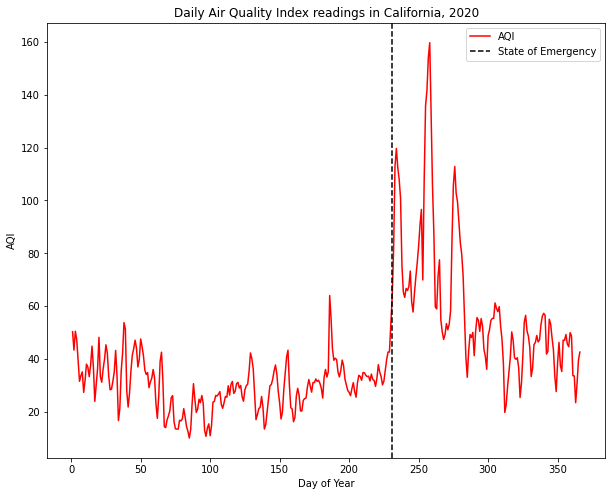

In [47]:
# plot the daily data
daily.plot(color='red')

#add title and axis labels
plt.title('Daily Air Quality Index readings in California, 2020')
plt.ylabel('AQI')
plt.xlabel('Day of Year')

# add a dashed black line on August 18th (the 231st day of the year)
plt.axvline(231, color='black', linestyle='--', label='State of Emergency')
plt.legend()

Pretty cool! We can clearly see some spikes in AQI that correspond directly to when the state of emergency was declared. Our data is matching expectations about reality: even though there's no information about the state of emergency or the wildfires in our dataframe (remember, it's just a bunch of air quality readings from sensors), we observe a relationship between our variables (presence of wildfires and air quality) that conforms to our expectations.

Now, repeat the above plot but aggregate the dataframe by month rather than by day. Store the monthly data as a new dataframe called "monthly". 

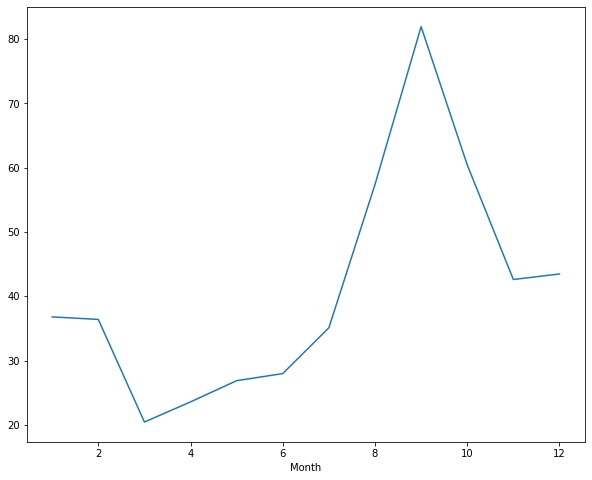

In [48]:
df.groupby('Month')['AQI'].mean().plot()


### Geographic Disparities

OK. We've got a good sense of how the wildfires affected air quality readings across the whole state. But California is huge; there are probably geographic disparities in how bad air quality was as a result of the fires. Let's see which counties were worst affected by the wildfires.  



In our original dataframe, each row was a reading from a given sensor on a given day. We grouped this data by day to create a dataframe that took the average of *all* sensors in california for each day as follows:

`df.groupby('Day')['AQI'].mean()`


Now, we want to plot the average daily air quality by county; this will involve aggregating both by day *and by county*. Intuitively, we can accomplish this changing `'Day'` to `['Day','COUNTY']`, like so:

`df.groupby(['Day','COUNTY'])['AQI'].mean()`

Let's store this new dataframe and call it "county_daily":

In [58]:
county_daily=df.groupby(['Day','COUNTY',])['AQI'].mean().reset_index()
county_daily

,Day,COUNTY,AQI
0,1,Alameda,44.500000
1,1,Butte,66.666667
2,1,Calaveras,63.000000
3,1,Colusa,78.000000
4,1,Contra Costa,46.000000
...,...,...,...
17314,366,Tehama,52.000000
17315,366,Trinity,36.000000
17316,366,Tulare,62.666667
17317,366,Ventura,23.666667


Using the `groupby` function, create a new dataframe called "counties" in which each row is a county, and each value is the **maximum** AQI value in that county during the entire year. Then, sort this dataframe in descending order using `.sort_values(ascending=False)`

In [55]:
counties=df.groupby('COUNTY')['AQI'].max().sort_values(ascending=False)
counties

COUNTY
Mono               714
Mariposa           574
Plumas             469
Mendocino          456
Santa Cruz         426
Inyo               420
Butte              379
Siskiyou           359
Sutter             303
San Luis Obispo    292
Nevada             252
Monterey           250
Madera             250
Fresno             249
Los Angeles        225
Placer             222
Del Norte          220
Alameda            218
Kern               210
Marin              206
Solano             204
Sacramento         200
Tulare             200
Napa               199
San Francisco      198
Kings              198
Colusa             198
Glenn              197
Contra Costa       197
Tehama             196
San Joaquin        195
Trinity            193
Yolo               192
Calaveras          192
Sonoma             187
San Mateo          186
Santa Clara        186
Stanislaus         184
Merced             183
Lake               180
San Diego          172
Santa Barbara      168
San Benito         168
Shas

Which county had the highest maximum AQI value? Which county had the lowest? store the names of these counties as varables called "highest" and "lowest", shown below:

In [64]:
highest='Mono'
lowest='Humboldt'

# Filter the county-level daily AQI readings for the worst-affected county
worst_county=county_daily[county_daily['COUNTY']==highest]

# Filter the county-level daily AQI readings for the least-affected county
best_county=county_daily[county_daily['COUNTY']==lowest]

Using those two variables, lets plot the AQI values for each of these counties individually: 

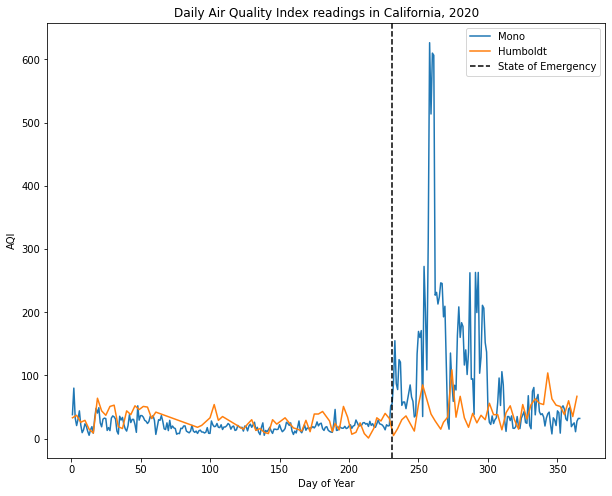

In [65]:
# plot the data from the worst affected county
plt.plot(worst_county['Day'], worst_county['AQI'], label=highest)

# plot the data from the least affected county
plt.plot(best_county['Day'], best_county['AQI'], label=lowest)

#add title and axis labels
plt.title('Daily Air Quality Index readings in California, 2020')
plt.ylabel('AQI')
plt.xlabel('Day of Year')

# add a dashed black line on August 18th (the 231st day of the year)
plt.axvline(231, color='black', linestyle='--', label='State of Emergency')
plt.legend()

We can see that the worst affected county suffered a massive spike in AQI following the wildfires, while the least affected county experienced a much smaller increase in AQI. 

## Bringing in Geography 

We can explore some limited geographic variation using the "COUNTY" column in our dataframe. But we actually have the latitude and longitude of each individual sensor. We can visualize latitude and longitude data quite simply as a scatterplot. 

Remember, in our original dataframe each row is a reading from a given sensor on a given day. The sensor's location does not vary over time, so if we simply plot our original dataframe, we'll have loads of points on top of each other. Let's pick a specific date, take a slice of our dataframe on that one date, and plot it. I've picked September 9th based on the plots above (looks like air quality was really bad). 

Text(0.5, 1.0, 'Geographic Distribution of AQI sensors in California')

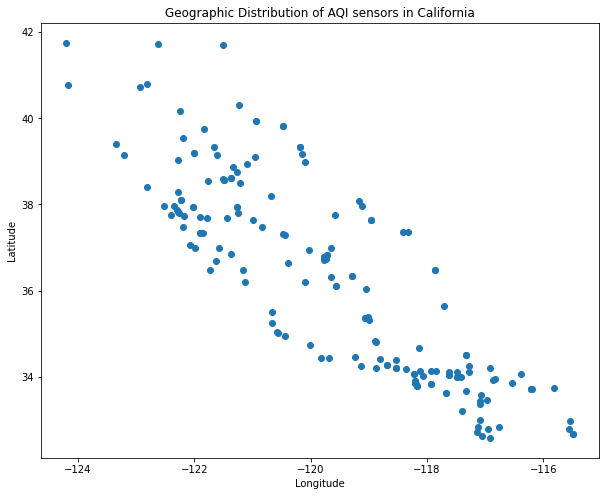

In [81]:
# create a variable with the date of interest, September 9th 2020. 
date='09-09-2020'

# filter the original dataframe using this date
one_day=df[df['Date']==date]

# create a scatterplot of sensor locations using latitude and longitude 
plt.scatter(
    x=one_day['longitude'],
    y=one_day['latitude'])

# as always, label our axes and the plot!
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of AQI sensors in California")

If you close your eyes and imagine the shape of California, you can probably see its outline roughly traced in the points above. This plot leaves a number of things to be desired. 

### Basemaps 

First, we may want to add in a base map of some kind so we can have a better sense of where each sensor is. For this, we have to import an extra library called "Basemap" 

Text(0.5, 1.0, 'Geographic Distribution of AQI sensors in California')

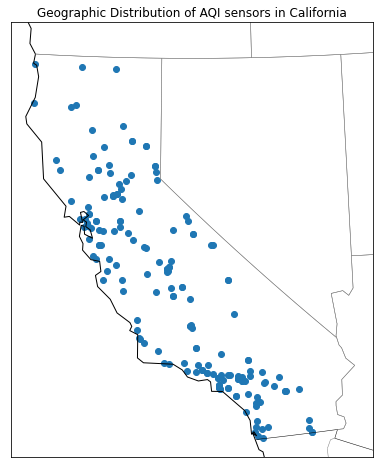

In [84]:
# import Basemap library
from mpl_toolkits.basemap import Basemap

# create a basemap, call it 'map'
map = Basemap(projection='lcc', resolution='l', # this selects the projection of the map.
            lat_0=37.5, lon_0=-119, # this sets the center of the map 
            width=1E6, height=1.2E6) # this sets the window that we're looking at, in meters.

# We can add features to our blank basemap, including coastlines, as well as state and country boundaries. 
map.drawcoastlines(color='black')
map.drawcountries(color='black')
map.drawstates(color='gray')

# Finally, we add in our AQI sensor data on top of the basemap.
map.scatter(
    one_day['longitude'], 
    one_day['latitude'], 
    latlon=True)

# as always, title your figure
plt.title("Geographic Distribution of AQI sensors in California")


That's looking a bit better! We now have a much better sense of the actual distribution of these sensors within california. People who know the area will recognize clusters of sensors around San Francisco and Los Angeles; This makes sense, given that these areas have a higher population density. However, our plot is still missing some pretty important information: the actual AQI readings! 

### Colormaps

The whole point of plotting these sensors is to understand the spatial distribution of air pollution from the 2020 wildfires. 

The EPA published the following [table](https://www.airnow.gov/aqi/aqi-basics/) on their website, which creates a color-coded scale of AQI values that corresponds to the impact thereof on human health. 

- AQI under 50 is colored green, and indicates "Good" air quality. 
- AQI between 100 and 200 is generally unhealthy 
- AQI over 300 is deemed hazardous. 

With this in mind, quickly scroll back up to the AQI plots over time. If you did everything correctly, you should notice that the *average* AQI value across all sensors in the worst affected county was over 600! 

We'll be using the table from the EPA website to build our own color map. In the code below, I scrape the table and turn it into a "colormap" (basically, a dictionary that associates numbers with colors) that we'll use to color the AQI sensors later. 

In [85]:
# scrape the table of AQI values and corresponding colors 
# save it as a dataframe called colors
colors=pd.read_html('https://www.airnow.gov/aqi/aqi-basics/')[0]

# create a numerical column for AQI values by splitting the test in the "values of index" column. 
# pull out the first string, and convert it to integer
colors['aqi']=colors['Values of Index'].str.split(' ').str[0].astype(int)

# print three columns from the dataframe 
print(colors[['aqi','Daily AQI Color','Levels of Concern']])

# create a "colormap" from this dataframe using the "Daily AQI Color" column, and the "aqi" column 
aqi_colors=matplotlib.colors.LinearSegmentedColormap.from_list(colors['aqi'],colors['Daily AQI Color'])

   aqi Daily AQI Color               Levels of Concern
0    0           Green                            Good
1   51          Yellow                        Moderate
2  101          Orange  Unhealthy for Sensitive Groups
3  151             Red                       Unhealthy
4  201          Purple                  Very Unhealthy
5  301          Maroon                       Hazardous


Now, we can use this "aqi_colors" object as a color palette later when we plot the AQI sensors. This way, we will know that green and yellow points are OK, while red and purple points represent hazardous levels of air pollution. I've annotated the code above, but it's ok if you don't get all of it. You could simply load a different colormap in one line of code; check out the documentation [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). 

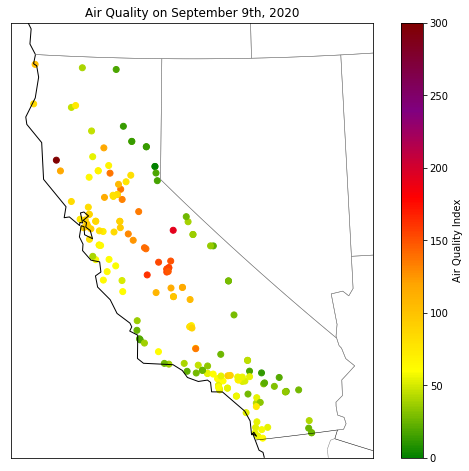

In [86]:
map = Basemap(projection='lcc', resolution='l', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)

map.drawcoastlines(color='black')
map.drawcountries(color='black')
map.drawstates(color='gray')

map.scatter(
      plot_data['longitude'], 
      plot_data['latitude'], 
      latlon=True, 
      c=plot_data['AQI'], # We're adding that 
      cmap=aqi_colors, 
      vmin=0, 
      vmax=300)


plt.title('Air Quality on September 9th, 2020')
plt.colorbar(label='Air Quality Index');

In [337]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [ ]:
https://plotly.com/python/bubble-maps/

In [309]:
!pip install ipyleaflet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 24.0 MB/s 


In [100]:
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles,Circle

m = Map(
  basemap=basemap_to_tiles(
    basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-09-09"
  ),
  center=(36.77, -119.41),
  zoom=6,
)
m.layout.height = '700px'

plot_data=df[df['Date']=='09-09-2020']

for index, row in plot_data.iterrows():
  color=matplotlib.colors.rgb2hex(aqi_colors(row['AQI']))
  point=Circle(location=(row['latitude'],row['longitude']), color=color)
  m.add_layer(point)
m

Map(center=[36.77, -119.41], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [110]:
def satellite_plot(date):
  
  ymd=datetime.strptime(date, '%d-%m-%Y').strftime('%Y-%m-%d')

  m = Map(
    basemap=basemap_to_tiles(
      basemaps.NASAGIBS.ModisTerraTrueColorCR, ymd
    ),
    center=(36.77, -119.41),
    zoom=6,
  )
  m.layout.height = '700px'

  plot_data=df[df['Date']==date]

  for index, row in plot_data.iterrows():
    color=matplotlib.colors.rgb2hex(aqi_colors(row['AQI']))
    point=Circle(location=(row['latitude'],row['longitude']), color=color)
    m.add_layer(point)
  return m



Now, we can simply change the date in the function and view both satellite imagery and AQI sensor data from a given day. Look at this clear day from February 3rd.

In [122]:
satellite_plot('02-03-2020')

Map(center=[36.77, -119.41], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

All the AQI sensors are showing green values, indicating generally good air quality. The satellite image shows a few wispy clouds, but no thick yellow smoke. Now change the date to September 15th, and see what happens! 

258


Map(center=[36.77, -119.41], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…